In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hajin-chung/learn-regression/main/data/indexData.csv")

df = df.loc[df['Index'] == 'NYA']

(3000,) (3000,)
(2000,)


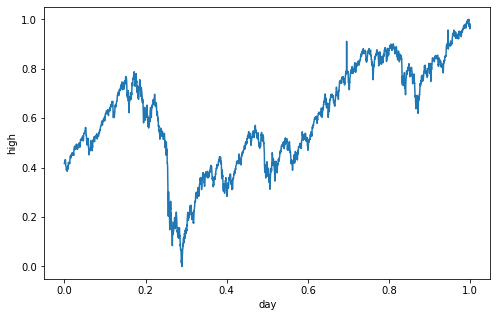

In [4]:
y_data = df["High"].values
x_data = np.arange(start=0, stop=len(y_data), step=1)

y_data = y_data[10000:13000]
x_data = x_data[10000:13000]

y_max = max(y_data)
y_min = min(y_data)
x_max = max(x_data)
x_min = min(x_data)


y_data = (y_data - y_min) / (y_max - y_min)
x_data = (x_data - x_min) / (x_max - x_min)


print(x_data.shape, y_data.shape)

plt.figure(figsize=(8, 5))
plt.ylabel('high')
plt.xlabel('day')
plt.plot(x_data, y_data)

xd = []
yd = []
for i in range(len(x_data)):
  if str(x_data[i]) != 'nan' and str(y_data[i]) != 'nan':
    xd.append([x_data[i]])
    yd.append([y_data[i]])
x_data = np.array(xd)
y_data = np.array(yd)
x_train, y_train = (np.append(x_data[::3], x_data[1::3]), np.append(y_data[::3], y_data[1::3]))
x_test, y_test = (x_data[2::3], y_data[2::3])

print(x_train.shape)


In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(1),
  tf.keras.layers.Dense(160, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(480, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
  optimizer='adam', 
  loss='mse', 
  metrics=['mae', 'mse'])

model.summary()

hist = model.fit(x_train, y_train, epochs=50)
model.evaluate(x_test, y_test, verbose=2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 160)               320       
                                                                 
 dropout_4 (Dropout)         (None, 160)               0         
                                                                 
 dense_9 (Dense)             (None, 480)               77280     
                                                                 
 dropout_5 (Dropout)         (None, 480)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               123136    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 200,993
Trainable params: 200,993
Non-tr

[0.004096962511539459, 0.05446166172623634, 0.004096962511539459]

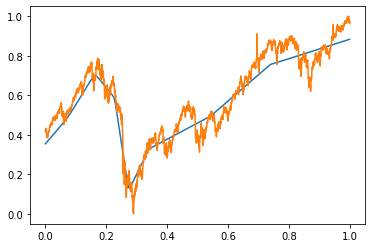

In [11]:
plt.plot(x_data, model.predict(x_data))
plt.plot(x_data, y_data)